<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Airbnb data analysis - *Amsterdam*

[Airbnb](https://www.airbnb.com) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Getting data


In [85]:
# importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [86]:
# importing csv file containing airbnb data into a DataFrame
df = pd.read_csv("./ams-listings.csv",index_col='id')
df

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
262394,Charming Studio with Roof Terrace,1376607,Martin,NaN,Zuid,52.356950,4.852340,Private room,NaN,3,113,2019-10-07,0.78,1,0,0,0363 B86D 98DE 3A24 8790
286500,"Centre, canal view with private bathroom",1491565,David,NaN,Centrum-West,52.375610,4.900000,Private room,148.0,3,373,2024-03-07,2.53,2,188,23,0363 DF01 FBC0 496B 9730
283170,5-bedrooms house; central location,1451657,Marco,NaN,Zuid,52.354350,4.873160,Entire home/apt,950.0,2,124,2023-10-08,0.85,1,0,6,0363 0240 34A0 48C3 6D81
290701,"Central, big window, rear room with private bath.",1491565,David,NaN,Centrum-West,52.375610,4.900000,Private room,138.0,3,448,2024-03-03,3.05,2,220,42,0363 DF01 FBC0 496B 9730
304082,Private+quiet studio in the heart of town+balc...,276068,Mirre,NaN,Centrum-West,52.372390,4.896570,Private room,142.0,3,294,2024-02-23,2.02,1,241,69,0363 6C40 7413 ADD3 9AF8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108849181649536044,Lovely stay,28916643,Nadia,NaN,Slotervaart,52.363420,4.837510,Entire home/apt,250.0,1,0,NaN,NaN,1,269,0,0363 A050 B431 A291 0710
1109126469335118294,Cozy apartment on hot spot.,50711042,Marc,NaN,Centrum-Oost,52.361767,4.887471,Entire home/apt,245.0,1,0,NaN,NaN,3,242,0,0363 B483 73B8 AEDB EFA4
1109162493263343239,Great stay at top location.,50711042,Marc,NaN,Centrum-Oost,52.361990,4.885580,Entire home/apt,341.0,1,0,NaN,NaN,3,239,0,0363 B483 73B8 AEDB EFA4


## Data Analysis


**Variable dictionary**
.
* id: listing's unique identifier number (categorical).
* name: listing's name (categorical).
* host_id: host's unique identifier number (categorical).
* host_name: host's name (categorical).
* neighbourhood_group: no data.
* neighbourhood: listing's neighbourhood (categorical).
* latitude: coordinates lat (numerical).
* longitude: coordinates long (numerical).
* room_type: type of listing, such as room, whole apartment, etc... (categorical).
* price: price per day (numerical).
* minimum_nights: the minimum amount of nights a guest has to stay to be able to book the listing (numerical).
* number_of_reviews: how many times the listing has received reviews from guests (numerical).
* last_review: date when the last review was left by a guest (categorical in this case - doesn't make sense to perform operations between last review dates between listings, we want to simply know the date).
* reviews_per_month: reviews per month (numerical).
* calculated_host_listings_count: number of listings the host has on airbnb (numerical).
* availability_365: days the listing is available for in a period of 365 days (numerical).
* number_of_reviews_ltm: number of reviews received in the last twelve months (numerical).
* license: listing's licence or permit code, if a license or permit is required (categorical).

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [87]:
# mostrar as 5 primeiras entradas
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
id,,,,,,,,,,,,,,,,,
262394,Charming Studio with Roof Terrace,1376607,Martin,NaN,Zuid,52.35695,4.85234,Private room,NaN,3,113,2019-10-07,0.78,1,0,0,0363 B86D 98DE 3A24 8790
286500,"Centre, canal view with private bathroom",1491565,David,NaN,Centrum-West,52.37561,4.90000,Private room,148.0,3,373,2024-03-07,2.53,2,188,23,0363 DF01 FBC0 496B 9730
283170,5-bedrooms house; central location,1451657,Marco,NaN,Zuid,52.35435,4.87316,Entire home/apt,950.0,2,124,2023-10-08,0.85,1,0,6,0363 0240 34A0 48C3 6D81
290701,"Central, big window, rear room with private bath.",1491565,David,NaN,Centrum-West,52.37561,4.90000,Private room,138.0,3,448,2024-03-03,3.05,2,220,42,0363 DF01 FBC0 496B 9730
304082,Private+quiet studio in the heart of town+balc...,276068,Mirre,NaN,Centrum-West,52.37239,4.89657,Private room,142.0,3,294,2024-02-23,2.02,1,241,69,0363 6C40 7413 ADD3 9AF8


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [88]:
# identify volume of data
print(f"Data has {df.shape[0]} rows and {df.shape[1]} columns.")
df.dtypes

Data has 8945 rows and 17 columns.


name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

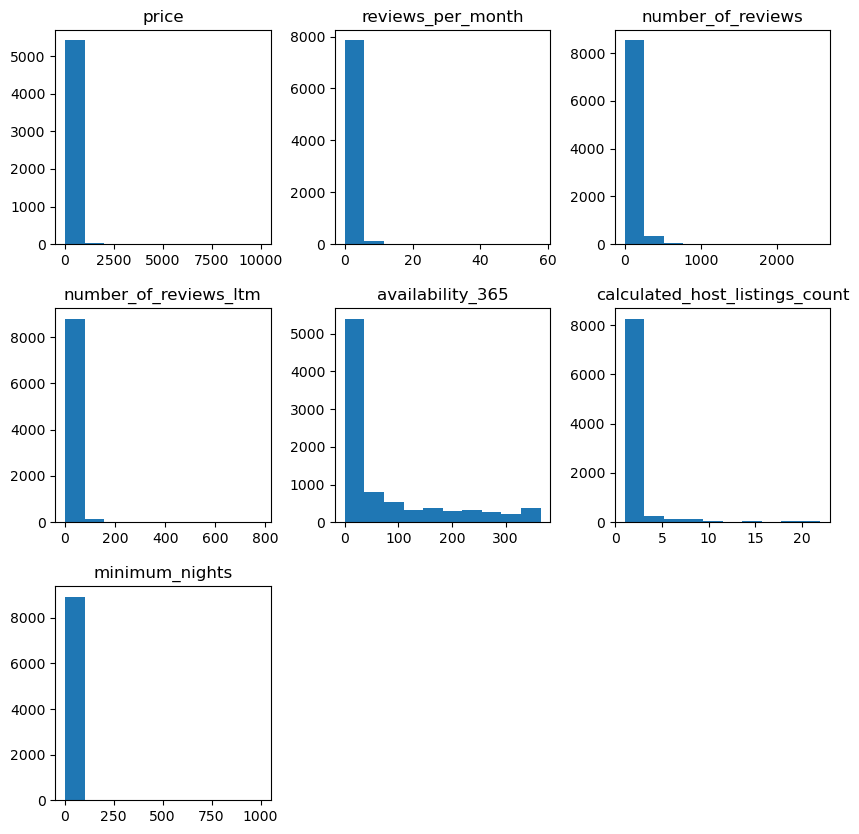

In [89]:
df.hist(column=['price','reviews_per_month','number_of_reviews','number_of_reviews_ltm','availability_365','calculated_host_listings_count','minimum_nights'], bins=10, figsize=(10,10), grid=False);

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [90]:
# ordering the amount of missing values in the dataset per column
df.isnull().sum().sort_values(ascending=False)/df.shape[0]

neighbourhood_group               1.000000
price                             0.390274
last_review                       0.107323
reviews_per_month                 0.107323
license                           0.010732
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
host_id                           0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
neighbourhood                     0.000000
host_name                         0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
number_of_reviews_ltm             0.000000
name                              0.000000
dtype: float64

## Cleaning dataset

* The *neighbourhood_group* column has no data, so we can drop it.
* There are 960 listings that seemingly haven't been reviewed yet, these shouldn't be removed just because they're missing values.
* The license missing values could just be filled with "exempted", since it's likely that data wasn't entered because the listing is exempted from having a license. 
* Nearly 40%  of listings don't have a price. Let's see what we can do about it. 

In [91]:
# dropping the empty column
df_clean = df.drop(columns=['neighbourhood_group'])

# filling missing license data with "Exempt"
df_clean = df_clean.fillna({'license':"Exempt"})

In [92]:
df_clean[['price','reviews_per_month','number_of_reviews','number_of_reviews_ltm','availability_365','calculated_host_listings_count','minimum_nights']].describe().round(2)

,price,reviews_per_month,number_of_reviews,number_of_reviews_ltm,availability_365,calculated_host_listings_count,minimum_nights
count,5454.00,7985.00,8945.00,8945.00,8945.00,8945.00,8945.00
mean,256.57,1.00,45.02,9.96,71.21,1.73,4.20
std,244.98,1.83,107.30,24.33,103.85,2.46,19.79
min,10.00,0.01,0.00,0.00,0.00,1.00,1.00
25%,150.00,0.23,3.00,0.00,0.00,1.00,2.00
50%,213.00,0.45,9.00,3.00,13.00,1.00,3.00
75%,300.00,0.94,34.00,7.00,106.00,1.00,4.00
max,10000.00,57.84,2575.00,781.00,365.00,22.00,1001.00


### Cleaning minimum_nights

The data related to reviews seem plausible. Even the maximum number of reviews in the last 12 months being 781 can be true for a property that is trending, for example.
However, the minimum nights has some clear outliers, with listings with a minimum nights of more than a year. 

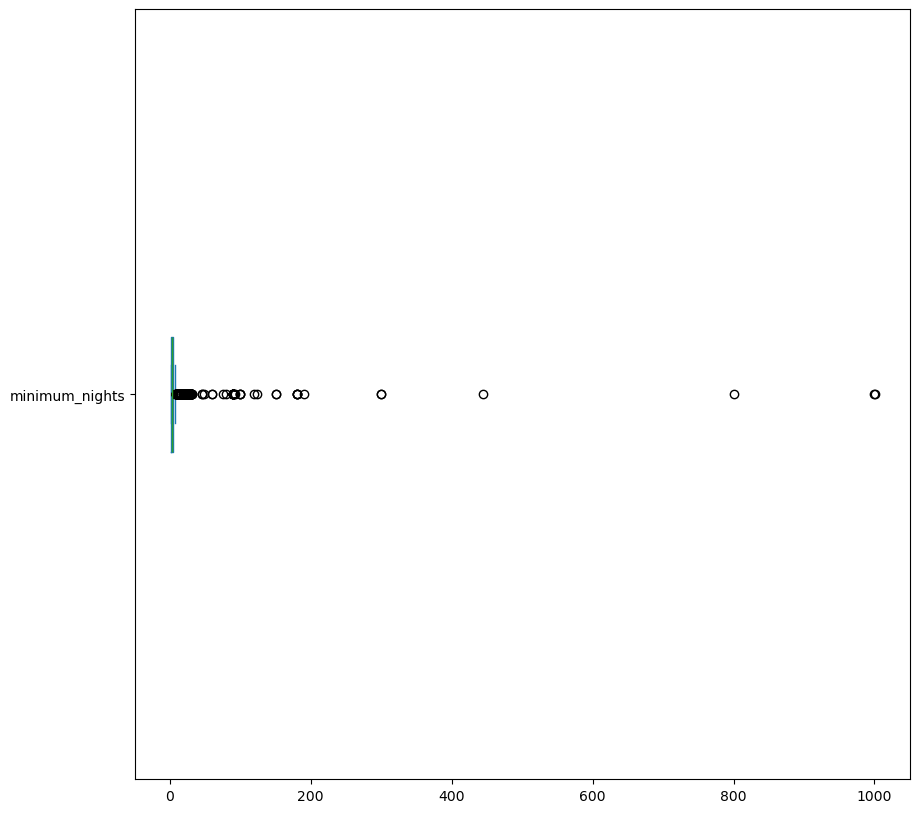

In [93]:
df_clean.minimum_nights.plot(kind='box',
                             vert=False,
                             figsize=(10,10));

In [94]:
df_clean.minimum_nights.sort_values(ascending=False).iloc[0:9]

id
18816109               1001
30140860                999
7394725                 800
19343174                444
19183967                300
1914964                 300
1014251280696672206     190
12577304                180
929613629343842634      180
Name: minimum_nights, dtype: int64

In [95]:
min_nights_q3 = df_clean.minimum_nights.quantile(.75)
min_nights_iqr = df_clean.minimum_nights.quantile(.75) - df_clean.minimum_nights.quantile(.25)

df_clean = df_clean[df_clean['minimum_nights'] < (min_nights_q3+min_nights_iqr*1.5)]
df_clean.minimum_nights.describe()

count    8276.000000
mean        2.646689
std         1.220218
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: minimum_nights, dtype: float64

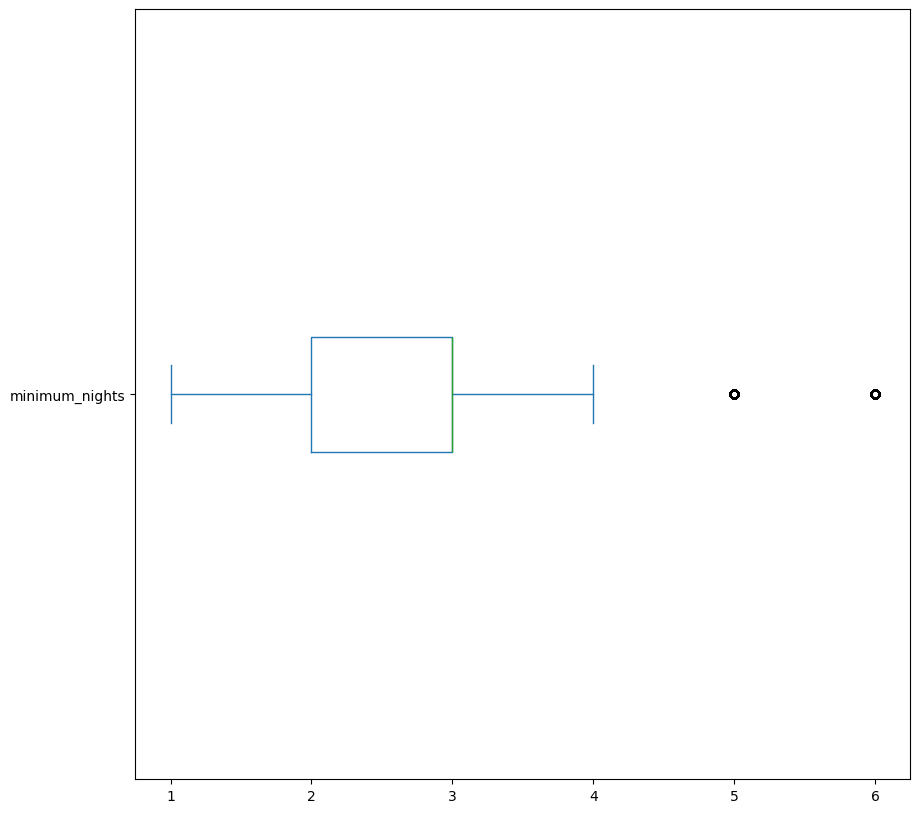

In [96]:
df_clean.minimum_nights.plot(kind='box',
                             vert=False,
                             figsize=(10,10));

### Cleaning price data

After checking the listings on [Airbnb](https://www.airbnb.com/rooms/2474754?adults=1&children=0&enable_m3_private_room=true&infants=0&location=Amsterdam%2C%20Netherlands&pets=0&search_mode=regular_search&check_in=2024-06-08&check_out=2024-06-13&source_impression_id=p3_1717843756_P3kwXwnWSOuO1hTi&previous_page_section_name=1001&federated_search_id=e370e06c-0227-42c1-8cd4-af81e87b4eef) we can find that the one with a $10.000,00 per night rate seems like a standard apartment, albeit in a good location. No reviewers said anything about the price. 

My hypothesis is that the host has changed the price to dissuade people from booking, instead of removing the listing from Airbnb. I believe we can safely remove this listing.
We can also remove the second highest price because they are clear outliers. Let's see the effect of these outliers on the mean. 

<Axes: xlabel='price'>

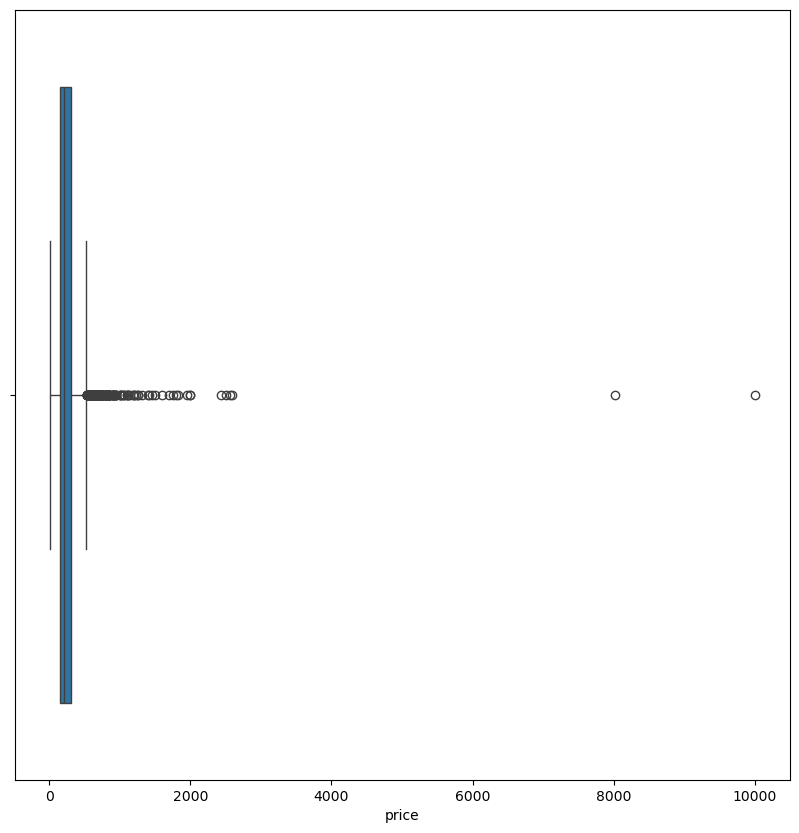

In [97]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_clean,x='price')

In [98]:
# top 10 most expensive listings in Amsterdam
df_clean.price.sort_values(ascending=False).iloc[0:9]

id
2474754               10000.0
897037429506065313     8014.0
612289973482163299     2591.0
643315499225242586     2561.0
15251558               2500.0
830497096365305089     2430.0
19939329               2000.0
721526610086726373     1995.0
53061883               1950.0
Name: price, dtype: float64

In [99]:
# filtering dataset
df_clean = df_clean[df_clean['price'] < 8000]
df_clean.price.describe()

count    5039.000000
mean      253.424886
std       176.817116
min        10.000000
25%       150.000000
50%       214.000000
75%       300.000000
max      2591.000000
Name: price, dtype: float64

In [100]:
df_clean[['price','reviews_per_month','number_of_reviews','number_of_reviews_ltm','availability_365','calculated_host_listings_count','minimum_nights']].describe().round(2)

,price,reviews_per_month,number_of_reviews,number_of_reviews_ltm,availability_365,calculated_host_listings_count,minimum_nights
count,5039.00,4492.00,5039.00,5039.00,5039.00,5039.00,5039.00
mean,253.42,1.41,64.34,15.23,106.56,1.87,2.54
std,176.82,2.30,134.76,30.80,109.47,2.62,1.21
min,10.00,0.01,0.00,0.00,0.00,1.00,1.00
25%,150.00,0.35,3.00,1.00,15.00,1.00,2.00
50%,214.00,0.64,11.00,5.00,63.00,1.00,2.00
75%,300.00,1.65,58.00,13.00,181.50,1.00,3.00
max,2591.00,57.84,2575.00,781.00,365.00,22.00,6.00


<Axes: xlabel='price'>

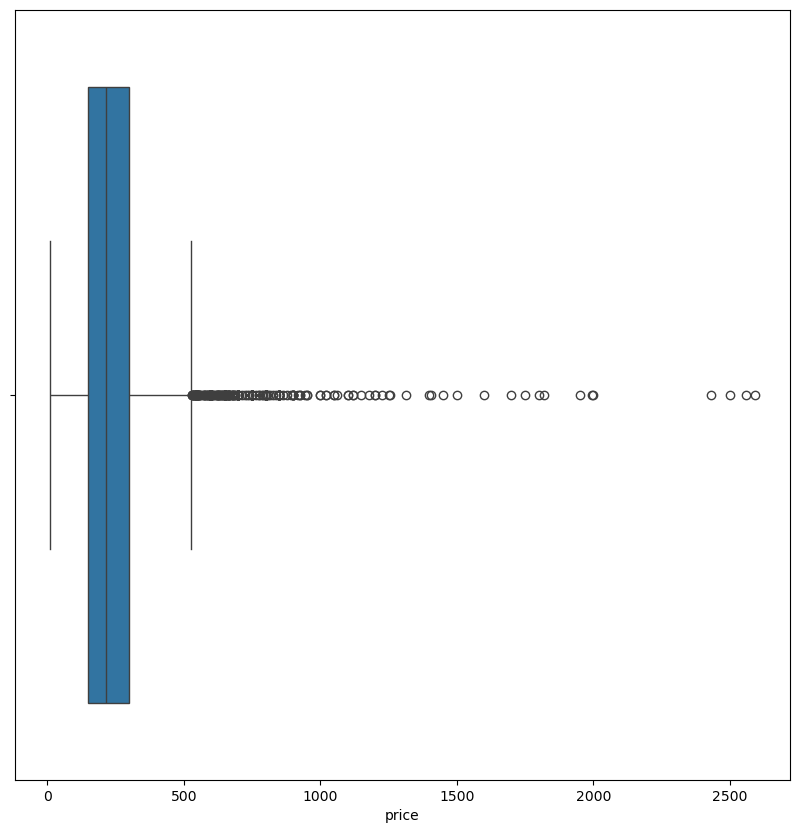

In [101]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df_clean,x='price')

In [102]:
df_clean.isnull().sum().sort_values(ascending=False)

last_review                       547
reviews_per_month                 547
name                                0
host_id                             0
host_name                           0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
license                             0
dtype: int64

In [103]:
df_clean = df_clean.dropna(subset=['last_review','reviews_per_month'],axis='index')
df_clean.isnull().sum().sort_values(ascending=False)

name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
dtype: int64

We successfully removed the outliers because: 

* Removing the listings with *minimum_nights* that were calculated as outliers didn't affect the dataset significantly. Less than 10% of rows were removed and the mean and median remained 3 days.
* The standard deviation for *price* went down by around 30%. 
* Median for *price* and *minimum_nights* is still the same.

### **Q3. Qual o tipo de distribuição das variáveis?**

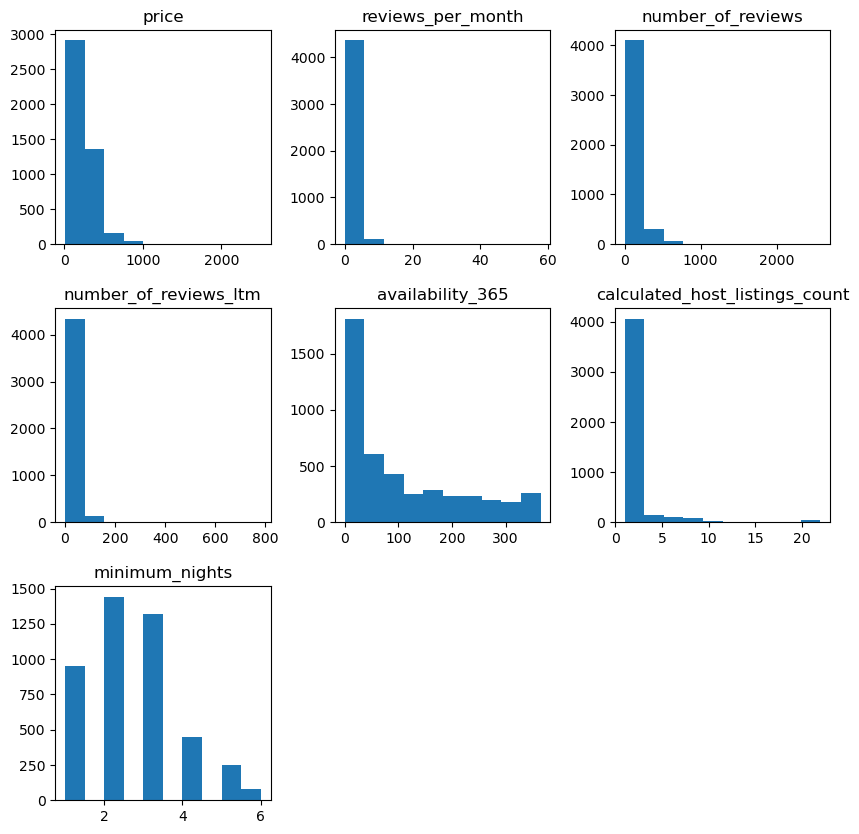

In [104]:
# plotar o histograma das variáveis numéricas
df_clean.hist(column=['price','reviews_per_month','number_of_reviews','number_of_reviews_ltm','availability_365','calculated_host_listings_count','minimum_nights'], bins=10, figsize=(10,10), grid=False);

### **Q4. Qual a média dos preços de aluguel?**

In [105]:
# checking average listing price
avg_price = df_clean.price.mean().round(2)
print(f"The average listing price is: ${avg_price}")

The average listing price is: $247.31


### **Q4. Qual a correlação existente entre as variáveis**

In [106]:
# criar uma matriz de correlação
correlation = df_clean[['price','reviews_per_month','number_of_reviews','number_of_reviews_ltm','availability_365','calculated_host_listings_count','minimum_nights']].corr()
# mostrar a matriz de correlação
display(correlation)

,price,reviews_per_month,number_of_reviews,number_of_reviews_ltm,availability_365,calculated_host_listings_count,minimum_nights
price,1.000000,-0.233552,-0.252447,-0.230278,0.105035,-0.092200,0.119690
reviews_per_month,-0.233552,1.000000,0.752468,0.906374,0.021429,0.116707,-0.255390
number_of_reviews,-0.252447,0.752468,1.000000,0.811057,-0.005253,0.040485,-0.198146
number_of_reviews_ltm,-0.230278,0.906374,0.811057,1.000000,0.005700,0.084977,-0.231277
availability_365,0.105035,0.021429,-0.005253,0.005700,1.000000,0.246407,-0.137285
calculated_host_listings_count,-0.092200,0.116707,0.040485,0.084977,0.246407,1.000000,-0.261319
minimum_nights,0.119690,-0.255390,-0.198146,-0.231277,-0.137285,-0.261319,1.000000


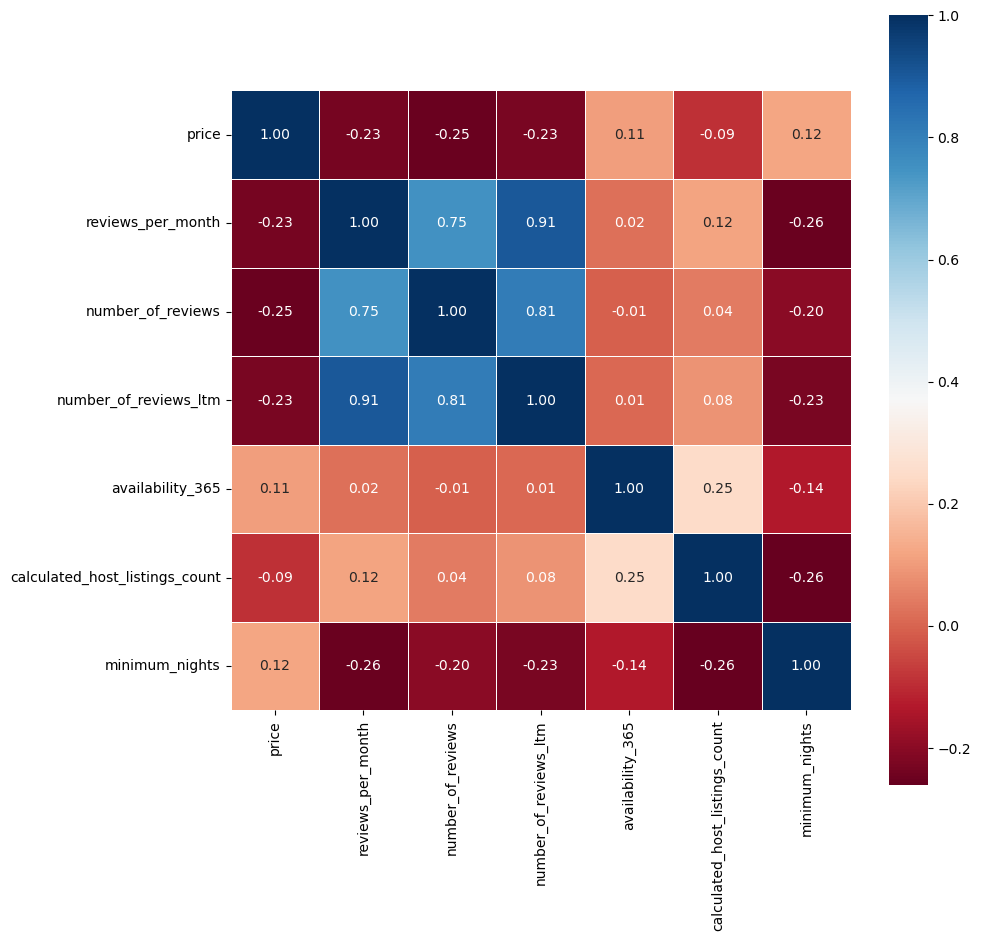

In [130]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap='RdBu',fmt='.2f',square=True,linecolor='white',linewidths=0.5,annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [108]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [109]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [110]:
# ver preços por bairros, na média


In [111]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [112]:
# ver a média da coluna `minimum_nights``

## Conclusões
